<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

 
<center><h2 style="font-size:2em;color:#840700">   Caso de estudio: Ventas </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/ventas.jpg" align="left" style="width:400px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

### Ejercicio

Utilzar los archivos "datos/ventas/*.txt" para contestar las siguientes preguntas. A continuación el código propuesto para obtener el dataframe:

```python
files = glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 
```

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [191]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<div class="alert alert-success">
    
0. Explicar que hace el código de arriba
    
</div> 

La primer línea del código crea una lista de nombre **files** que contiene todos los archivos.txt de la carpeta *ventas*.
La segunda línea convierte cada arrchivo .txt de **files** en un DataFrame y los concatena en un **df**. La tercera línea se deshace de todas las filas que contengan por lo menos un valor nulo. Al parecer la columna 'Quantity Ordered' de **df** contiene algunos valores iguales al string 'Quantity Ordered', por lo que la cuarta línea del código se encarga de filtrar todas las filas que contengan este valor, dejando solo números.

<div class="alert alert-success">
    
1. Encuentre el número de productos que se adquirieron en Los Angeles, CA
    
</div> 

In [192]:
# Convertir las columnas utiles a variables numericas
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda number: int(number))
df['Price Each'] = df['Price Each'].apply(lambda number: float(number))

In [193]:
mask = df['Purchase Address'].apply(lambda word: 'Los Angeles, CA' in word)
df[mask]['Quantity Ordered'].sum()

33289

<div class="alert alert-success">
    
2. ¿Cuántos iPhone se vendieron?

    
</div> 

In [194]:
df[df['Product'] == 'iPhone']['Quantity Ordered'].sum()

6849

<div class="alert alert-success">
    
3. ¿Cuánto fue su ganancia por venta de baterías? 
    
</div> 

In [195]:
mask = df['Product'].apply(lambda word: 'Batteries' in word)
(df[mask]['Price Each'] * df[mask]['Quantity Ordered']).sum()

198859.23

<div class="alert alert-success">
    
4. ¿Cuál fue el código postal que más ordenes realizó?

    
</div> 

In [196]:
df['Purchase Address'].apply(lambda direction: direction.split(', ')[-1]).value_counts().idxmax()

'CA 94016'

<div class="alert alert-success">
    
5.  a) ¿Cuál fue el producto con más ganancias?
    
    b) ¿Cuál fue el producto con más unidades vendidas?

    
</div> 

In [197]:
df['Ganancias'] = df['Price Each'] * df['Quantity Ordered']

In [198]:
df.groupby('Product')['Ganancias'].sum().idxmax()

'Macbook Pro Laptop'

In [199]:
#B
df.groupby('Product')['Quantity Ordered'].sum().idxmax()

'AAA Batteries (4-pack)'

<div class="alert alert-success">
    
6. ¿Cuales son los 5 productos más vendidos?     
</div> 

In [200]:
df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending = False).head(5)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


<div class="alert alert-success">
    
7.  ¿Cuales son los 5 productos con las ganancias más altas?

    
</div> 

In [201]:
df.groupby('Product')['Ganancias'].sum().reset_index().sort_values('Ganancias', ascending = False).head(5)

,Product,Ganancias
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56


<div class="alert alert-success">
    
8. ¿A qué hora recomendaría mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?     
</div> 

In [202]:
data = df
data['Order Date'] = pd.to_datetime(data['Order Date'], format= '%m/%d/%y %H:%M')
data.set_index('Order Date', inplace = True)
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Ganancias
Order Date,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00


In [203]:
hours = data.resample('H')['Quantity Ordered','Ganancias'].sum()

Se tienen dos picos de ventas a las 19:00:00 y a las 12:00:00 horas


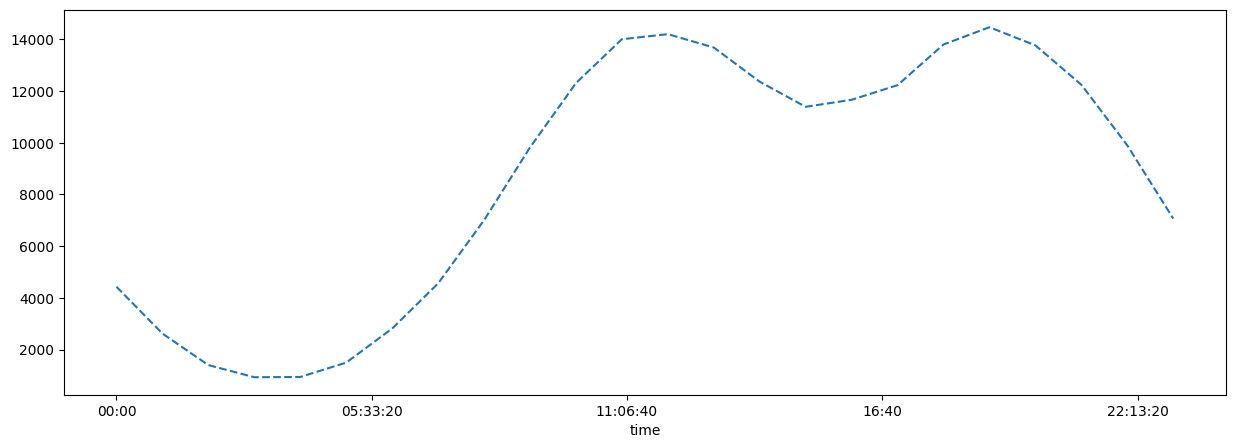

In [204]:
by_sells = hours['Quantity Ordered'].groupby(hours.index.time).sum()
by_sells.plot(style=['--'],figsize=(15,5));
print('Se tienen dos picos de ventas a las', by_sells.idxmax(), 'y a las',
     by_sells.sort_values(ascending = False).index[1], 'horas')

Se tienen dos picos de ganancias a las 19:00:00 y a las 12:00:00 horas


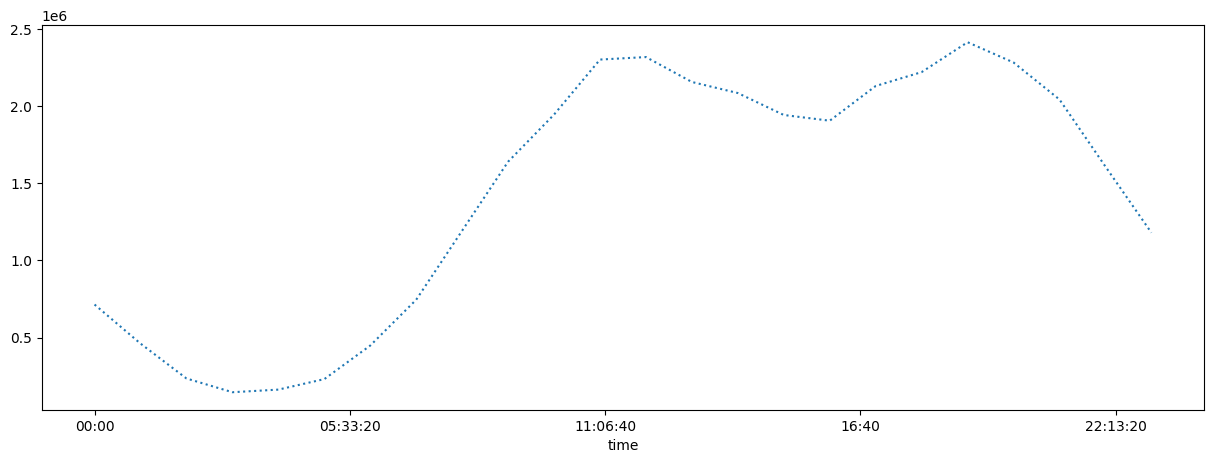

In [205]:
by_gain = hours['Ganancias'].groupby(hours.index.time).sum()
by_gain.plot(style=[':'],figsize=(15,5));
print('Se tienen dos picos de ganancias a las', by_gain.idxmax(), 'y a las',
     by_gain.sort_values(ascending = False).index[1], 'horas')

<div class="alert alert-info">

  Se observa que tanto el análisis por ganancias como el análisis por ventas coinciden en las mismas horas. Por tanto, es recomendable mostrar publicidad entre las 7 y 8 p.m. o bien, entre las 12 y la 1 p.m. 

</div>

<div class="alert alert-success">
    
 9. 
    a) ¿Cuál es el día de más ganancias por cada mes?
    
    b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
    
</div> 

In [206]:
print('A continuacion se presenta una lista con los dias de mayor ganancia para cada mes:')
data['Ganancias'].resample('D').sum().resample('M').apply(lambda x: x.idxmax().strftime('%Y-%m-%d')).values

A continuacion se presenta una lista con los dias de mayor ganancia para cada mes:


array(['2019-01-11', '2019-02-08', '2019-03-22', '2019-04-24',
       '2019-05-26', '2019-06-09', '2019-07-21', '2019-08-10',
       '2019-09-09', '2019-10-06', '2019-11-24', '2019-12-04',
       '2020-01-01'], dtype=object)

In [207]:
print('Mes con mayor ganancia:', data.resample('M')['Ganancias'].sum().idxmax().strftime('%Y-%m'))
print('Mes con menor ganancia:', data.resample('M')['Ganancias'].sum().idxmin().strftime('%Y-%m'))

Mes con mayor ganancia: 2019-12
Mes con menor ganancia: 2020-01


<div class="alert alert-success">
    
10. ¿Cuál fue el producto más comprado en San Francisco, CA
    
</div> 

In [208]:
mask = df['Purchase Address'].apply(lambda word: 'San Francisco, CA' in word)
df[mask].groupby('Product')['Quantity Ordered'].sum().idxmax()

'AAA Batteries (4-pack)'

<div class="alert alert-success">
    
11. Escribir una conclusión del ejercicio (ventajas de usar pandas, herramientas mas utilizadas en este ejercicio, etc). 
    
</div> 

Pandas ofrece una gran variedad de herramientas para el analisis de datos, en esta tarea se utilizaron los Timestamps para facilitar la tarea de ordenar y analizar los datos, entre las herramientas mas utilizadas están **.resample()** y **.groupby()**, las cuales fueron de gran conveniencia al momento de ordenar los datos por distintos intervalos de tiempo: meses, días y horas. Otra función que fue de gran utilidad fue **.idxmax()**, pues nos devuelve el indice del valor maximo en una Serie, y nos ahorra gran espacio en el codigo. Otra de las funciones que fue de ayuda en esta tarea es **in**, ya que se utilizó para crear las máscaras booleanas necesarias en algunos de los ejercicios. También se utilizaron funciones **lambda** para ahorrar espacio y darle presentación al código utilizado.